# importing dataset and preprocessing

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [20]:
url = "https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/seeds.csv"
df = pd.read_csv(url)
df.head()

,area,perimeter,compactness,length,width,asymmetry,length.1
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [21]:
df = df.rename(columns = {'length.1':'length_1'})

In [22]:
df.shape

(210, 7)

In [23]:
df.isnull().sum()

area           0
perimeter      0
compactness    3
length         0
width          1
asymmetry      0
length_1       0
dtype: int64

In [24]:
df.describe()

,area,perimeter,compactness,length,width,asymmetry,length_1
count,210.000000,210.000000,207.000000,210.000000,209.000000,210.000000,210.000000
mean,14.847524,14.559286,0.871280,5.563918,3.281440,3.693530,5.407386
std,2.909699,1.305959,0.023306,0.719594,0.419907,1.495112,0.527212
min,10.590000,12.410000,0.808100,0.818900,2.630000,0.765100,3.485000
25%,12.270000,13.450000,0.857700,5.244750,2.956000,2.600250,5.045250
50%,14.355000,14.320000,0.873500,5.518000,3.245000,3.599000,5.247000
75%,17.305000,15.715000,0.887650,5.979750,3.566000,4.768750,5.878500
max,21.180000,17.250000,0.918300,6.675000,5.325000,8.456000,6.735000


# Data visualization

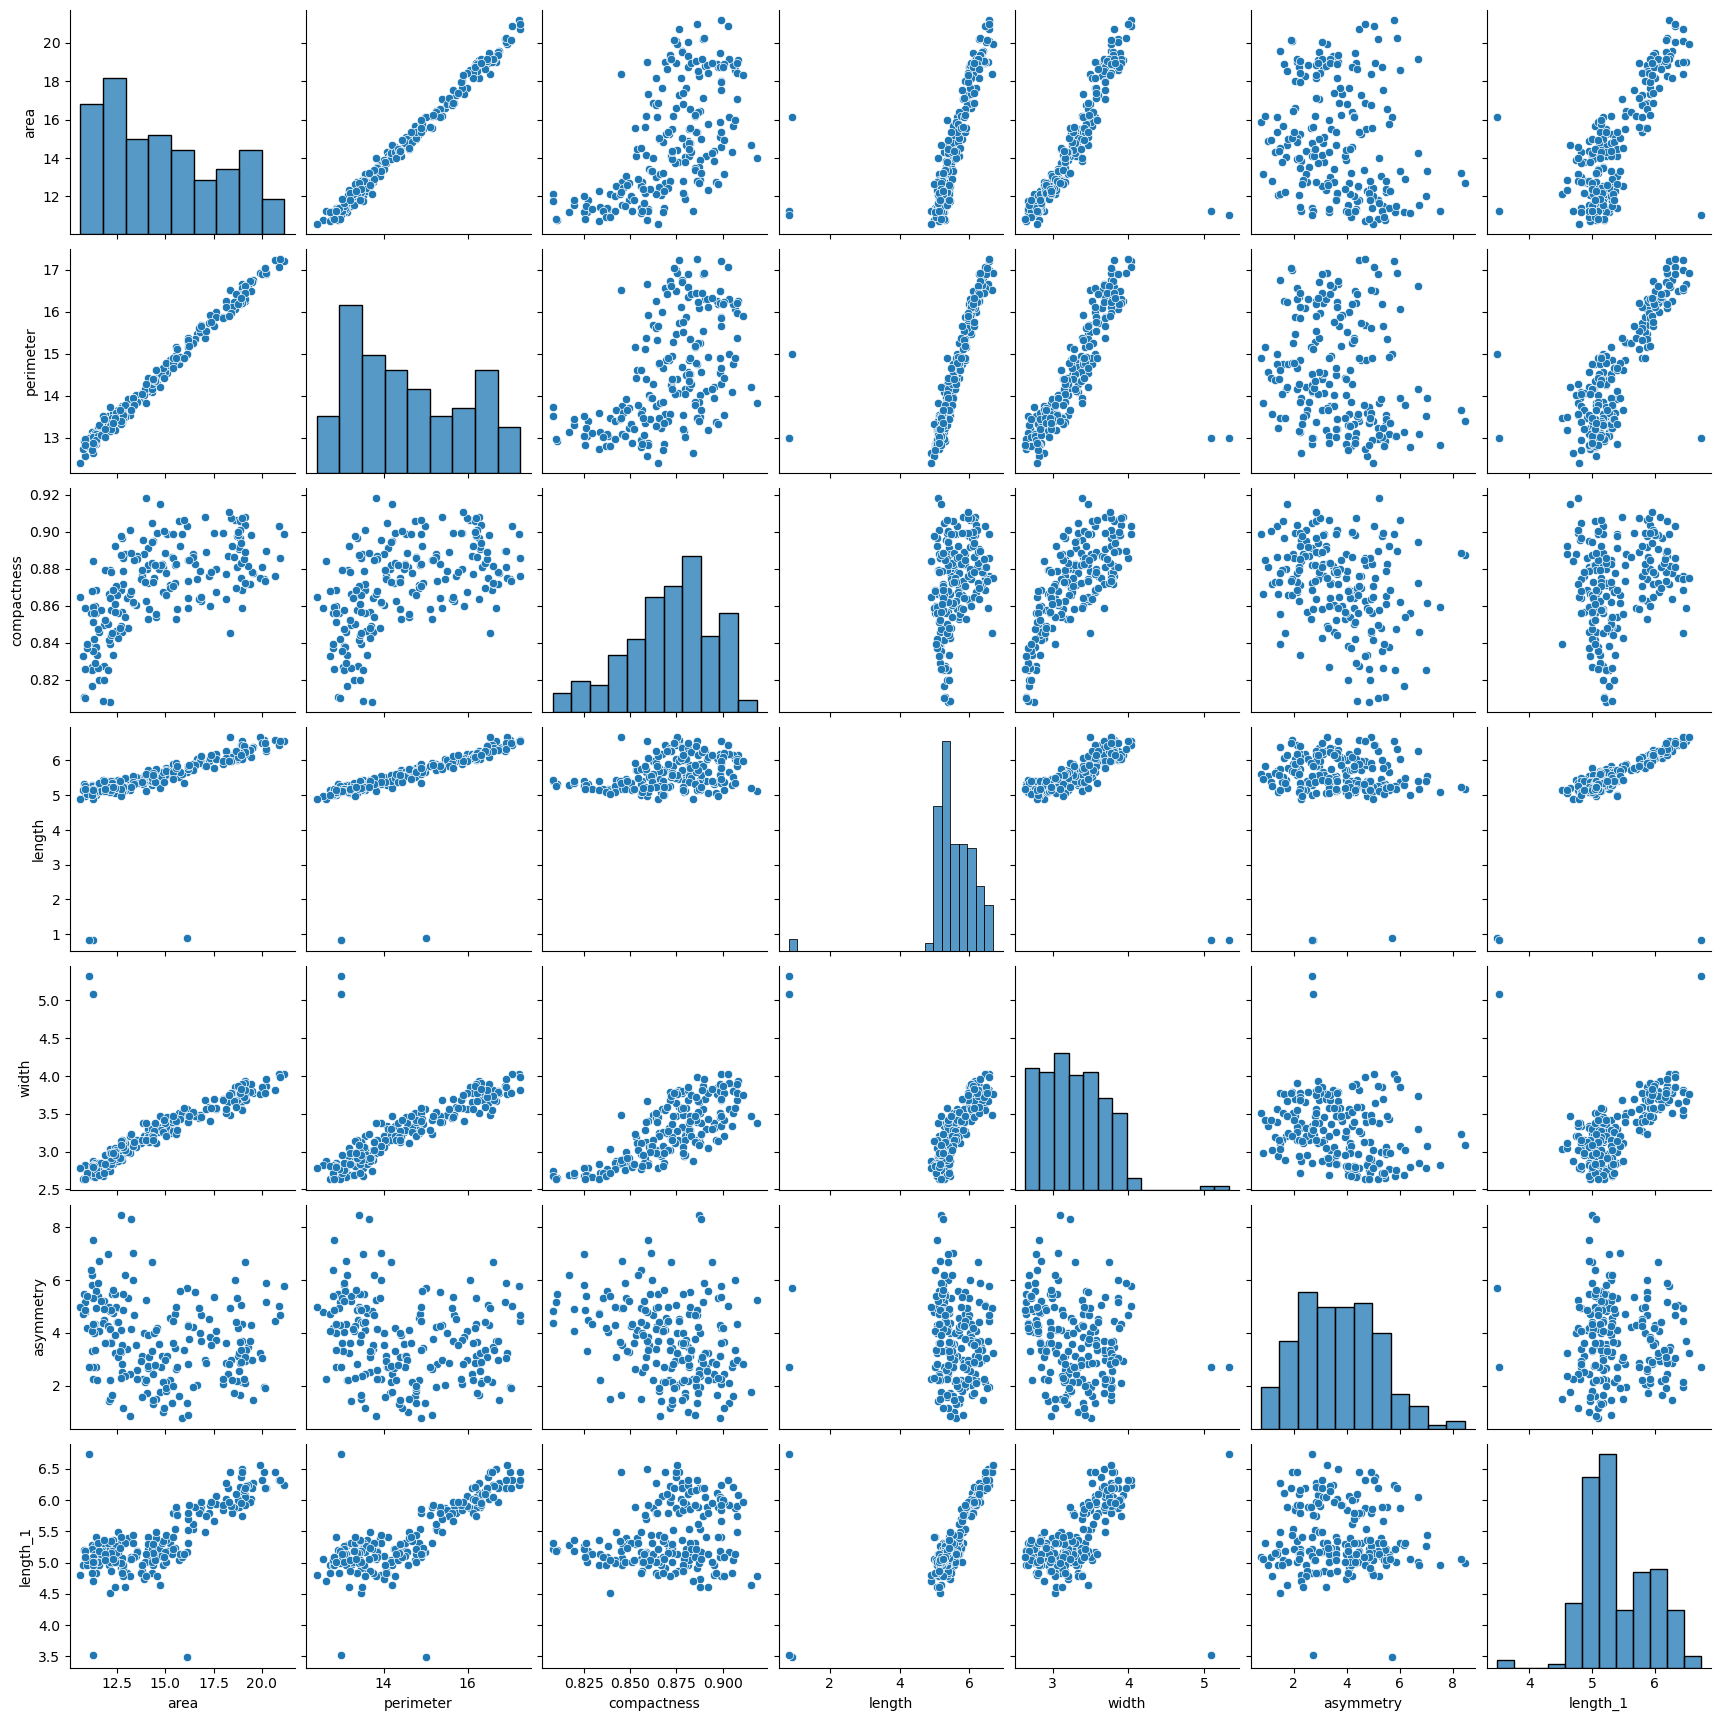

In [25]:
sns.pairplot(df)

Text(0.5, 1.0, 'perimeter and length_1 plot')

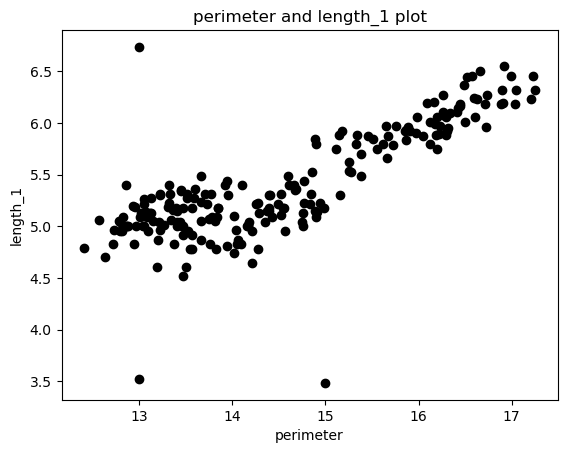

In [30]:
#perimeter and length.1
plt.scatter(df.perimeter , df.length_1, color='black')
plt.xlabel('perimeter')
plt.ylabel('length_1')
plt.title('perimeter and length_1 plot')

# K-means cluster Analysis

In [32]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=8)
kmean.fit(df[['perimeter','length_1']])

KMeans()

In [34]:
kmean.fit(df[['perimeter','length_1']])
df['new_clusters'] =  kmean.predict(df[['perimeter','length_1']])
df.head()

,area,perimeter,compactness,length,width,asymmetry,length_1,new_clusters
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,2
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,7
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,7
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,2


In [35]:
df0 = df[df.new_clusters == 0]
df1 = df[df.new_clusters == 1]
df2 = df[df.new_clusters == 2]
df3 = df[df.new_clusters == 3]
df4 = df[df.new_clusters == 4]
df5 = df[df.new_clusters == 5]
df6 = df[df.new_clusters == 6]
df7 = df[df.new_clusters == 7]

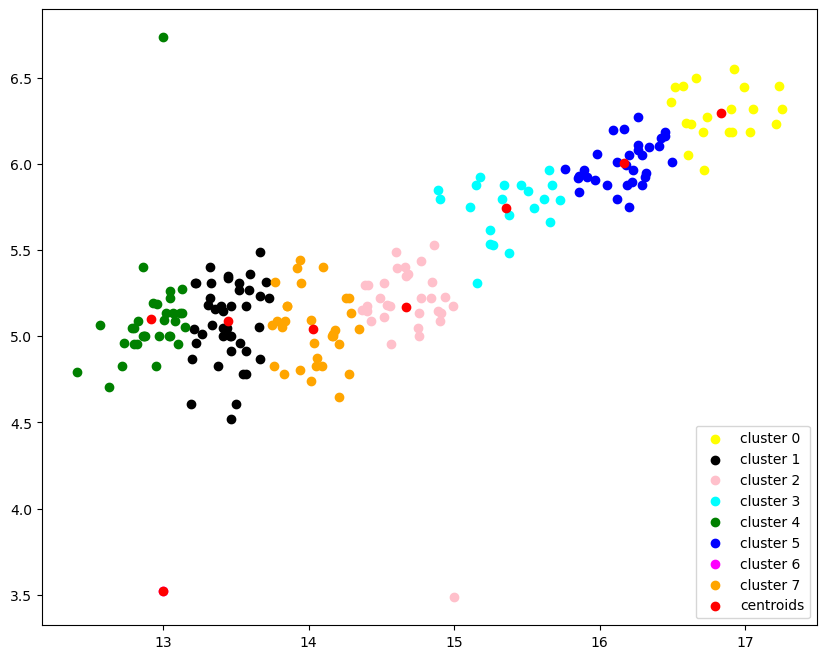

In [39]:
plt.figure(figsize=(10,8))
plt.scatter(df0.perimeter, df0.length_1, color='yellow', label='cluster 0')
plt.scatter(df1.perimeter, df1.length_1, color='black', label='cluster 1')
plt.scatter(df2.perimeter, df2.length_1, color='pink', label='cluster 2')
plt.scatter(df3.perimeter, df3.length_1, color='cyan', label='cluster 3')
plt.scatter(df4.perimeter, df4.length_1, color='green', label='cluster 4')
plt.scatter(df5.perimeter, df5.length_1, color='blue', label='cluster 5')
plt.scatter(df6.perimeter, df6.length_1, color='magenta', label='cluster 6')
plt.scatter(df7.perimeter, df7.length_1, color='orange', label='cluster 7')

center = kmean.cluster_centers_
plt.scatter(center[:,0] , center[:,1], color='red', label='centroids')

plt.legend()

# Optimizing KMeans

In [42]:
wcss = []
cluster_range = range(1,15)
for k in cluster_range:
    kmean2 = KMeans(n_clusters=k)
    kmean2.fit(df[['perimeter','length_1']])
    wcss.append(kmean2.inertia_)

In [43]:
wcss

[414.5475466142857,
 102.99813247155284,
 53.50976724164977,
 39.816688651616495,
 30.73867749773949,
 28.646295738562408,
 21.623675075052525,
 19.62312216128969,
 17.591941164797063,
 16.683160881028115,
 13.993774230213052,
 11.89651649701564,
 9.976132368760812,
 8.386055562703241]

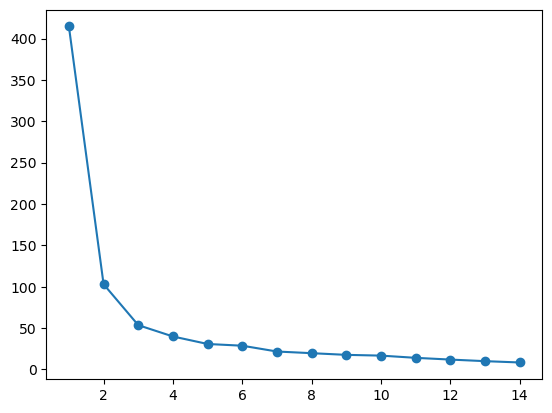

In [44]:
plt.plot(cluster_range, wcss,marker='o')

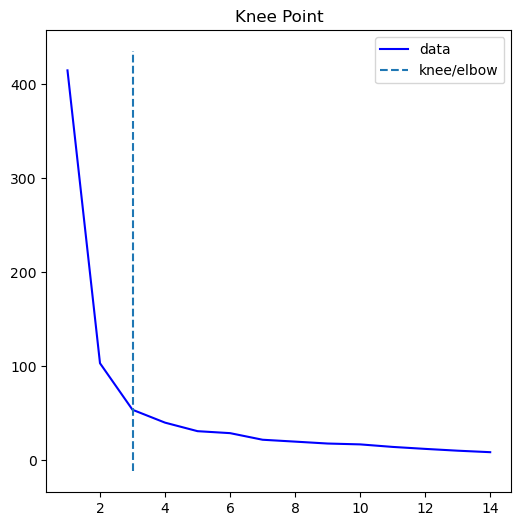

In [46]:
from kneed import KneeLocator
kn = KneeLocator(cluster_range, wcss, direction='decreasing', curve='convex')
kn.plot_knee()

In [47]:
km = KMeans(n_clusters=5)
df['new_clusters'] = km.fit_predict(df[['perimeter','length_1']])
df.head()

,area,perimeter,compactness,length,width,asymmetry,length_1,new_clusters
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,4
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,4
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,4
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,4


In [51]:
center2 = km.cluster_centers_
center2

array([[15.48357143,  5.78721429],
       [13.5725    ,  5.14363462],
       [16.50955556,  6.14544444],
       [12.95891892,  4.98797297],
       [14.494375  ,  5.10291667]])

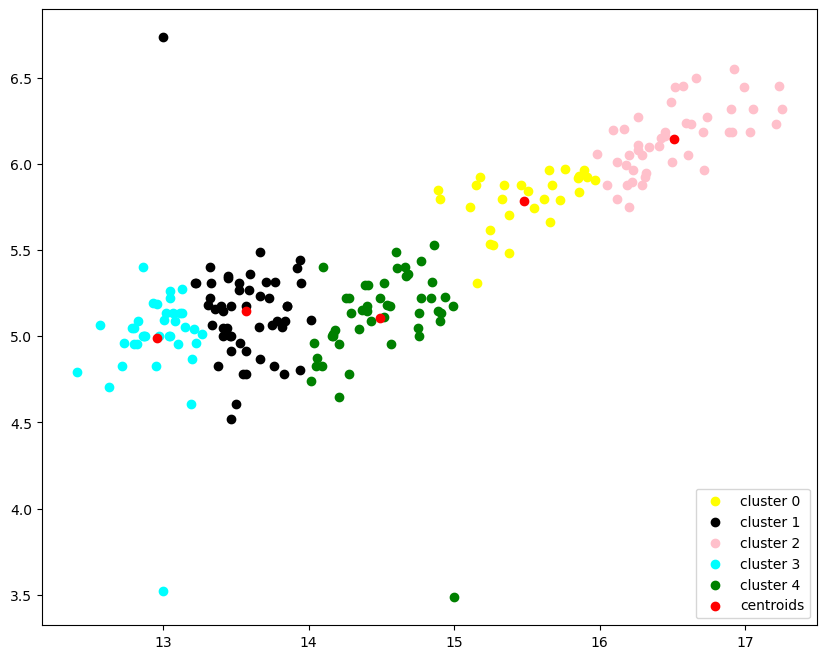

In [52]:
df0 = df[df.new_clusters == 0]
df1 = df[df.new_clusters == 1]
df2 = df[df.new_clusters == 2]
df3 = df[df.new_clusters == 3]
df4 = df[df.new_clusters == 4]

plt.figure(figsize=(10,8))
plt.scatter(df0.perimeter, df0.length_1, color='yellow', label='cluster 0')
plt.scatter(df1.perimeter, df1.length_1, color='black', label='cluster 1')
plt.scatter(df2.perimeter, df2.length_1, color='pink', label='cluster 2')
plt.scatter(df3.perimeter, df3.length_1, color='cyan', label='cluster 3')
plt.scatter(df4.perimeter, df4.length_1, color='green', label='cluster 4')



plt.scatter(center2[:,0] , center2[:,1], color='red', label='centroids')

plt.legend()